# Meta Labeling
This notebook is a small MVP regarding the idea of meta labeling by Marcos Lopez de Prado, Advances in Financial Machine Learning, Chapter 3, pg 50. 

The central idea is to create a secondary ML model that learns how to use the primary exogenous model. This leads to improved performance metrics, including: Accuracy, Precision, Recall, and F1-Score.

To illustrate the concept we made use of the MNIST data set to train a binary classifier on identifying the number 3, from a set that only includes the digits 3 and 5. The reason for this is that the number 3 looks very similar to 5 and we expect there to be some overlap in the data, i.e. the data are not linearly separable. Another reason we chose the MNIST dataset to illustrate the concept, is that MNIST is a solved problem and we can witness improvements in performance metrics with ease. 

## Papers
The following papers were mentioned in the Bibliography, that highlight what we thought may have been some of the inspiration for meta labeling. 
* [Wang, J. Chan, S. 2006. Stock market trading rule discovery using two-layer bias decision tree. Expert Systems with Applications 30 (2006) 605–611 ](https://www.sciencedirect.com/science/article/pii/S095741740500148X)
* [Qin, Q. Wang, Q. Li, J. Sam Ge, S. 2013. Linear and Nonlinear Trading Models with Gradient Boosted Random Forests and Application to Singapore Stock Market. Journal of Intelligent Learning Systems and Applications, 2013, 5, 1-10](http://file.scirp.org/pdf/JILSA_2013022213381465.pdf)
* [Tsai, C.F. and Wang, S.P., 2009, March. Stock price forecasting by hybrid machine learning techniques. In Proceedings of the International MultiConference of Engineers and Computer Scientists (Vol. 1, No. 755, p. 60).](https://pdfs.semanticscholar.org/0fb3/9b308ec17401ec5697139dcf7f832080179f.pdf)
* [Patel, J., Shah, S., Thakkar, P. and Kotecha, K., 2015. Predicting stock market index using fusion of machine learning techniques. Expert Systems with Applications, 42(4), pp.2162-2172.](https://www.sciencedirect.com/science/article/pii/S0957417414006551)
* [Zhu, M., Philpotts, D., Sparks, R. and Stevenson, M.J., 2011. A hybrid approach to combining CART and logistic regression for stock ranking. Journal of Portfolio Management, 38(1), p.100.](https://search.proquest.com/openview/65025597d6bcc7b430cb9c41ddfdf203/1?pq-origsite=gscholar&cbl=49137)

### Advances in Financial Machine Learning, Chapter 3, page 50. Reads:
#### Meta Labeling
Suppose that you have a model for setting the side of the bet (long or short). You just need to learn the size of that bet, which includes the possibility of no bet at all (zero size). This is a situation that practitioners face regularly. We often know whether we want to buy or sell a product, and the only remaining question is how much money we should risk in such a bet. We do not want the ML algorithm to learn the side, just to tell us what is the appropriate size. At this point, it probably does not surprise you to hear that no book or paper has so far discussed this common problem. Thankfully, that misery ends here.

I call this problem meta-labeling because we want to build a secondary ML model that learns how to use a primary exogenous model. 

The ML algorithm will be trained to decide whether to take the bet or pass, a purely binary prediction. When the predicted label is 1, we can use the probability of this secondary prediction to derive the size of the bet, where the side (sign) of the position has been set by the primary model.

#### How to use Meta-Labeling
Binary classification problems present a trade-off between type-I errors (false positives) and type-II errors (false negatives). In general, increasing the true positive rate of a binary classifier will tend to increase its false positive rate. The receiver operating characteristic (ROC) curve of a binary classifier measures the cost of increasing the true positive rate, in terms of accepting higher false positive rates.

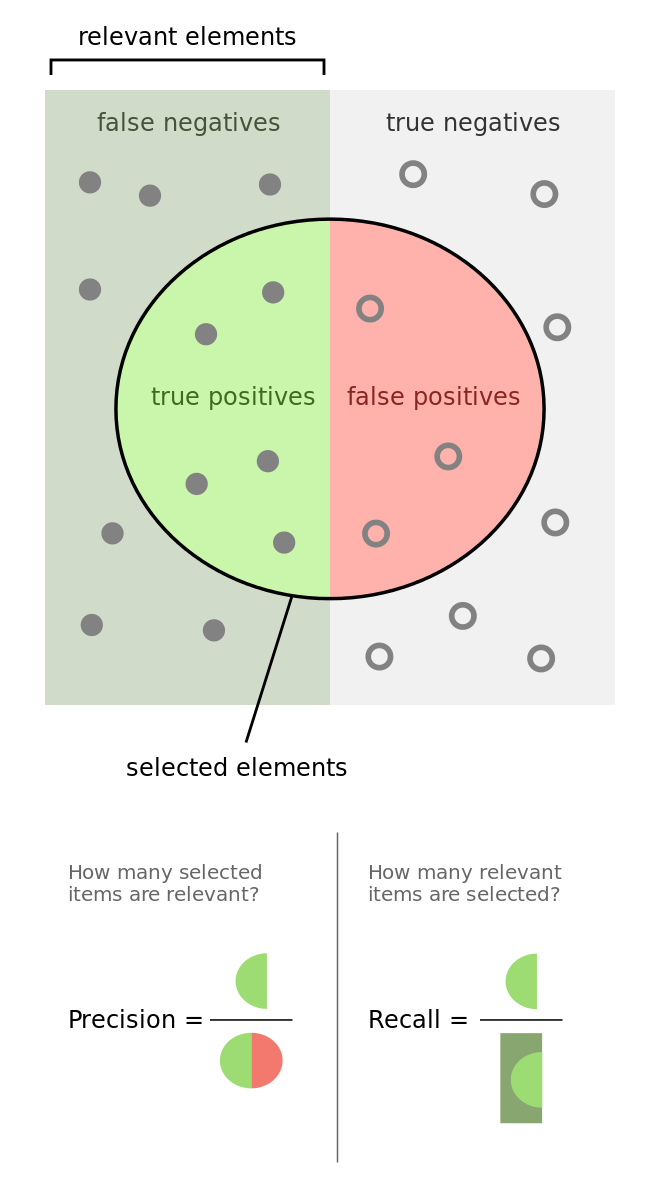

In [24]:
from IPython.core.display import Image, display
display(Image('https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/660px-Precisionrecall.svg.png', width=300, unconfined=True))

The image illustrates the so-called “confusion matrix.” On a set of observations, there are items that exhibit a condition (positives, left rectangle), and items that do not
exhibit a condition (negative, right rectangle). A binary classifier predicts that some items exhibit the condition (ellipse), where the TP area contains the true positives and the TN area contains the true negatives. This leads to two kinds of errors: false positives (FP) and false negatives (FN). “Precision” is the ratio between the TP area and the area in the ellipse. “Recall” is the ratio between the TP area and the area in the left rectangle. This notion of recall (aka true positive rate) is in the context of classification problems, the analogous to “power” in the context of hypothesis testing. “Accuracy” is the sum of the TP and TN areas divided by the overall set of items (square). In general, decreasing the FP area comes at a cost of increasing the FN area, because higher precision typically means fewer calls, hence lower recall. Still, there is some combination of precision and recall that maximizes the overall efficiency of the classifier. The F1-score measures the efficiency of a classifier as the harmonic average between precision and recall.

**Meta-labeling is particularly helpful when you want to achieve higher F1-scores**. First, we build a model that achieves high recall, even if the precision is not particularly high. Second, we correct for the low precision by applying meta-labeling to the positives predicted by the primary model.

Meta-labeling will increase your F1-score by filtering out the false positives, where the majority of positives have already been identified by the primary model. Stated differently, the role of the secondary ML algorithm is to determine whether a positive from the primary (exogenous) model is true or false. It is *not* its purpose to come up with a betting opportunity. Its purpose is to determine whether we should act or pass on the opportunity that has been presented.

Meta-labeling is a very powerful tool to have in your arsenal, for four additional reasons. **First**, ML algorithms are often criticized as black boxes.
Meta-labeling allows you to build an ML system on top of a white box (like a fundamental model founded on economic theory). This ability to transform a fundamental model into an ML model should make meta-labeling particularly useful to “quantamental” firms. **Second**, the effects of overfitting are limited when you apply metalabeling,
because ML will not decide the side of your bet, only the size. **Third**, by decoupling the side prediction from the size prediction, meta-labeling enables sophisticated
strategy structures. For instance, consider that the features driving a rally may differ from the features driving a sell-off. In that case, you may want to develop an
ML strategy exclusively for long positions, based on the buy recommendations of a primary model, and an ML strategy exclusively for short positions, based on the
sell recommendations of an entirely different primary model. **Fourth**, achieving high accuracy on small bets and low accuracy on large bets will ruin you. As important as
identifying good opportunities is to size them properly, so it makes sense to develop an ML algorithm solely focused on getting that critical decision (sizing) right. We will
retake this fourth point in Chapter 10. In my experience, meta-labeling ML models can deliver more robust and reliable outcomes than standard labeling models.

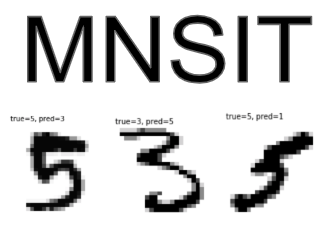

In [29]:
Image(filename='MNIST.png')

## Model Architecture
The following image explains the model architecture. The **first** step is to train a primary model (binary classification). **Second** a threshold level is determined at which the primary model has a high recall, in the coded example you will find that 0.30 is a good threshold, ROC curves could be used to help determine a good level. **Third** the features from the first model are concatenated with the predictions from the first model, into a new feature set for the secondary model. Meta Labels are used as the target variable in the second model. Now fit the second model. **Fourth** the prediction from the secondary model is combined with the prediction from the primary model and only where both are true, is your final prediction true. I.e. if your primary model predicts a 3 and your secondary model says you have a high probability of the primary model being correct, is your final prediction a 3, else not 3.

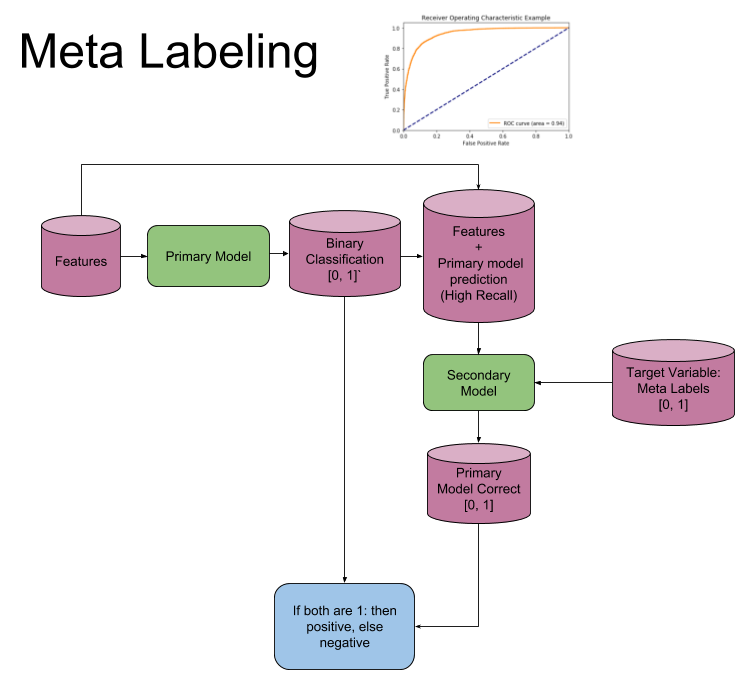

In [31]:
Image(filename='Model Architecture.png')

---
# MVP Using MNIST Data

#### Import libraries needed:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import seaborn as sns
from subprocess import check_output
from sklearn import metrics as sk_metrics
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

%matplotlib inline

Using TensorFlow backend.


#### Functions:
Two functions are specified. The first to plot ROC curves and give an indication at which level to set the thresholds. Second to compare the results of modeling without and then with meta labeling

In [2]:
def plot_roc(actual, prediction):
    # Calculate ROC / AUC
    fpr, tpr, thresholds = sk_metrics.roc_curve(actual, prediction, pos_label=1)
    roc_auc = sk_metrics.auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Example')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
def test_meta_label(primary_model, secondary_model, x, y, threshold):
    """
    Function outputs the results of the primary model with a threshold of 50%. It then outputs the results of the meta model.
    Ideally you want to see that the meta model out performs the primary model.

    I am busy investigating why meta modeling works. A little tricky since I'm yet to find a solid paper on the technique. Its very briefly mentioned in
    Advances in Financial Machine Learning.

    :param primary_model: model object (First, we build a model that achieves high recall, even if the precision is not particularly high)
    :param secondary_model: model object (the role of the secondary ML algorithm is to determine whether a positive from the primary (exogenous) model
                            is true or false. It is not its purpose to come up with a betting opportunity. Its purpose is to determine whether
                            we should act or pass on the opportunity that has been presented.)
    :param x: Explanatory variables
    :param y: Target variable (One hot encoded)
    :param threshold: The confidence threshold. This is used
    :return: Print the classification report for both the base model and the meta model.
    """
    # Get the actual labels (y) from the encoded y labels
    actual = np.array([i[1] for i in y]) == 1

    # Use primary model to score the data x
    primary_prediction = primary_model.predict(x)
    primary_prediction = np.array([i[1] for i in primary_prediction]).reshape((-1, 1))
    primary_prediction_int = primary_prediction > threshold # binary labels

    # Print output for base model
    print('Base Model Metrics:')
    print(sk_metrics.classification_report(actual, primary_prediction > 0.50))
    print('Confusion Matrix')
    print(sk_metrics.confusion_matrix(actual, primary_prediction_int))
    accuracy = (actual == primary_prediction_int.flatten()).sum() / actual.shape[0]
    print('Accuracy: ', round(accuracy, 4))
    print('')

    # Secondary model
    new_features = np.concatenate((primary_prediction_int, x), axis=1)

    # Use secondary model to score the new features
    meta_prediction = secondary_model.predict(new_features)
    meta_prediction = np.array([i[1] for i in meta_prediction])
    meta_prediction_int = meta_prediction > 0.5 # binary labels

    # Now combine primary and secondary model in a final prediction
    final_prediction = (meta_prediction_int & primary_prediction_int.flatten())

    # Print output for meta model
    print('Meta Label Metrics: ')
    print(sk_metrics.classification_report(actual, final_prediction))
    print('Confusion Matrix')
    print(sk_metrics.confusion_matrix(actual, final_prediction))
    accuracy = (actual == final_prediction).sum() / actual.shape[0]
    print('Accuracy: ', round(accuracy, 4))

### Data Exploration
Download the MNIST data set

In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Show the counts of each number
Counter(y_test)

Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

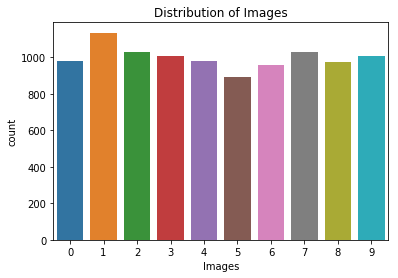

In [6]:
# Plot the distribution of numbers
sns.countplot(y_test)
plt.title('Distribution of Images')
plt.xlabel('Images')
plt.show()

---
### Normalize and Subset Data
* It is standard practice to normalize the MNIST data by 255.0
* Next we subset the data so that we only include the numbers 3 and 5
* Reshape the data: We will use a feed forward neural network or a logistic regression, for this we can just flatten the images
* One Hot Encode the target variables
* Do a test train split, keep a hold out sample

In [7]:
# Normalising the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
# Change these params if you want to change the numbers selected
num1 = 3
num2 = 5

# Subset on only two numbers
x_sub_train = x_train[(y_train == num1) | (y_train == num2)]
y_sub_train = y_train[(y_train == num1) | (y_train == num2)]

x_sub_test = x_test[(y_test == num1) | (y_test == num2)]
y_sub_test = y_test[(y_test == num1) | (y_test == num2)]

print('X values')
print('x_train', x_sub_train.shape)
print('x_test', x_sub_test.shape, '\n')
print('Y values')
print('y train', y_sub_train.shape)
print('y test', y_sub_test.shape)

X values
x_train (11552, 28, 28)
x_test (1902, 28, 28) 

Y values
y train (11552,)
y test (1902,)


In [9]:
# Flatten input
x_train_flat = x_sub_train.flatten().reshape(x_sub_train.shape[0], 28*28)
x_test_flat = x_sub_test.flatten().reshape(x_sub_test.shape[0], 28*28)

# One hot encode target variables
y_sub_train_encoded = to_categorical([1 if value == num1 else 0 for value in y_sub_train])

# Test train split
X_train, X_val, Y_train, Y_val = train_test_split(x_train_flat, y_sub_train_encoded, test_size = 0.1, random_state=42)

---
### Build Primary Model with High Recall
The **first** step is to train a primary model (binary classification). For this we trained a logistic regression, using the keras package. The data are split into a 90% train, 10% validation. This allows us to see when we are overfitting.
* Loss function: categorical crossentropy 
* Optimizer: Adam ([Keras Optimizers](https://keras.io/optimizers/))
* Epochs: 3
* Batch size: 320

You can train a more complex neural network by adding more dense layers.

In [10]:
# Build primary model
model = Sequential()
model.add(Dense(units=2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x=X_train, y=Y_train, validation_data=(X_val, Y_val), epochs=3, batch_size=320) # batch size is so large so that the model can be poorly fit, Its easy to get 99% accuracy.

Train on 10396 samples, validate on 1156 samples
Epoch 1/3
10396/10396 [==============================] - 1s 48us/step - loss: 0.4704 - acc: 0.8121 - val_loss: 0.3416 - val_acc: 0.8988
Epoch 2/3
10396/10396 [==============================] - 0s 26us/step - loss: 0.2904 - acc: 0.9188 - val_loss: 0.2546 - val_acc: 0.9230
Epoch 3/3
10396/10396 [==============================] - 0s 22us/step - loss: 0.2283 - acc: 0.9335 - val_loss: 0.2179 - val_acc: 0.9325


**Second** a threshold level is determined at which the primary model has a high recall, in the coded example you will find that 0.30 is a good threshold, ROC curves could be used to help determine a good level. 

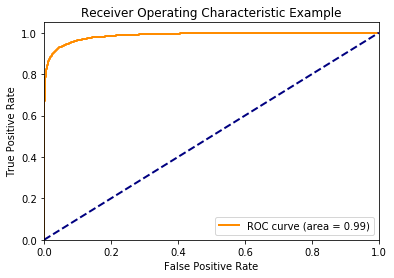

In [11]:
# Plot ROC
prediction = model.predict(X_train)
prediction = np.array([i[1] for i in prediction])
actual = np.array([i[1] for i in Y_train]) == 1

plot_roc(actual, prediction)

In [12]:
# Create a model with high recall, change the threshold until a good recall level is reached
threshold = .30
prediction_int = np.array(prediction) > threshold

# Classification report
print(sk_metrics.classification_report(actual, prediction_int))

# Confusion matrix
cm = sk_metrics.confusion_matrix(actual, prediction_int)
print('Confusion Matrix')
print(cm)

              precision    recall  f1-score   support

       False       0.98      0.79      0.87      4861
        True       0.84      0.99      0.91      5535

   micro avg       0.89      0.89      0.89     10396
   macro avg       0.91      0.89      0.89     10396
weighted avg       0.91      0.89      0.89     10396

Confusion Matrix
[[3817 1044]
 [  76 5459]]


Notice that by increasing our true positive rate (Recall) we have also increased our false positive rate. You are encouraged to change the threshold levels to see how it impacts on Recall.

### Build Meta Model
**Third** the features from the first model are concatenated with the predictions from the first model, into a new feature set for the secondary model. Meta Labels are used as the target variable in the second model. Now fit the second model.

Meta labels are defined as: If the primary model's predictions matches the actual values, then we label it as 1, else 0. In the code below we said that if an observation was a true positive or true negative then label it as 1(i.e. the model is correct), else 0 (the model in incorrect). Note that because it is categorical, we have to add One Hot Encoding.

In [13]:
# Get meta labels
meta_labels = prediction_int & actual
meta_labels_encoded = to_categorical(meta_labels)

In [14]:
# Reshape data
prediction_int = prediction_int.reshape((-1, 1))

# MNIST data + forecasts_int
new_features = np.concatenate((prediction_int, X_train), axis=1)

We use logistic regression here as well. We could have used a more complicated model but it turns out that it's very easy to differentiate between 2 numbers of MNIST data. So we used a simple model to make sure we get a model that leaves room for improvement. 
* Loss function: categorical crossentropy 
* Optimizer: Adam ([Keras Optimizers](https://keras.io/optimizers/))
* Epochs: 4
* Batch size: 32

You can train a more complex neural network by adding more dense layers.

In [15]:
# Train a new model 
# Build model
meta_model = Sequential()
meta_model.add(Dense(units=2, activation='softmax'))

meta_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
meta_model.fit(x=new_features, y=meta_labels_encoded, epochs=4, batch_size=32)

Epoch 1/4
10396/10396 [==============================] - 1s 101us/step - loss: 0.2552 - acc: 0.9024
Epoch 2/4
10396/10396 [==============================] - 1s 92us/step - loss: 0.1269 - acc: 0.9538
Epoch 3/4
10396/10396 [==============================] - 1s 73us/step - loss: 0.1060 - acc: 0.9620
Epoch 4/4
10396/10396 [==============================] - 1s 84us/step - loss: 0.0961 - acc: 0.9643


---
### Evaluate Performance
**Fourth** the prediction from the secondary model is combined with the prediction from the primary model and only where both are true, is your final prediction true. e.g. if your primary model predicts a 3 and your secondary model says you have a high probability of the primary model being correct, is your final prediction a 3, else not 3.

The section below shows the performance of the primary model vs the performance of using meta labeling. Notice how the performance metrics improve.

### Evaluate train data

In [16]:
test_meta_label(primary_model=model, secondary_model=meta_model, x=X_train, y=Y_train, threshold=threshold)

Base Model Metrics:
              precision    recall  f1-score   support

       False       0.94      0.92      0.93      4861
        True       0.93      0.95      0.94      5535

   micro avg       0.94      0.94      0.94     10396
   macro avg       0.94      0.94      0.94     10396
weighted avg       0.94      0.94      0.94     10396

Confusion Matrix
[[3817 1044]
 [  76 5459]]
Accuracy:  0.8923

Meta Label Metrics: 
              precision    recall  f1-score   support

       False       0.94      0.97      0.96      4861
        True       0.97      0.95      0.96      5535

   micro avg       0.96      0.96      0.96     10396
   macro avg       0.96      0.96      0.96     10396
weighted avg       0.96      0.96      0.96     10396

Confusion Matrix
[[4704  157]
 [ 274 5261]]
Accuracy:  0.9585


---
### Evaluate validation Data

In [17]:
test_meta_label(primary_model=model, secondary_model=meta_model, x=X_val, y=Y_val, threshold=threshold)

Base Model Metrics:
              precision    recall  f1-score   support

       False       0.94      0.93      0.93       560
        True       0.93      0.94      0.93       596

   micro avg       0.93      0.93      0.93      1156
   macro avg       0.93      0.93      0.93      1156
weighted avg       0.93      0.93      0.93      1156

Confusion Matrix
[[428 132]
 [ 13 583]]
Accuracy:  0.8746

Meta Label Metrics: 
              precision    recall  f1-score   support

       False       0.94      0.96      0.95       560
        True       0.97      0.94      0.95       596

   micro avg       0.95      0.95      0.95      1156
   macro avg       0.95      0.95      0.95      1156
weighted avg       0.95      0.95      0.95      1156

Confusion Matrix
[[540  20]
 [ 35 561]]
Accuracy:  0.9524


---
### Evaluate hold out sample

In [18]:
# Flatten input
x_test_flat = x_sub_test.flatten().reshape(x_sub_test.shape[0], 28*28)

# One hot encode target variables
y_sub_test_encoded = to_categorical([1 if value == num1 else 0 for value in y_sub_test])

In [20]:
test_meta_label(primary_model=model, secondary_model=meta_model, x=x_test_flat, y=y_sub_test_encoded, threshold=threshold)

Base Model Metrics:
              precision    recall  f1-score   support

       False       0.95      0.94      0.94       892
        True       0.94      0.96      0.95      1010

   micro avg       0.95      0.95      0.95      1902
   macro avg       0.95      0.95      0.95      1902
weighted avg       0.95      0.95      0.95      1902

Confusion Matrix
[[700 192]
 [ 11 999]]
Accuracy:  0.8933

Meta Label Metrics: 
              precision    recall  f1-score   support

       False       0.95      0.96      0.95       892
        True       0.96      0.95      0.96      1010

   micro avg       0.96      0.96      0.96      1902
   macro avg       0.96      0.96      0.96      1902
weighted avg       0.96      0.96      0.96      1902

Confusion Matrix
[[857  35]
 [ 47 963]]
Accuracy:  0.9569


---
## Conclusion
Meta labeling works as advertised.

We can see that in the confusion matrix, that the false positives from the primary model, are now being correctly identified as true negatives with the help of meta labeling. This leads to a boost in performance metrics.